<a href="https://colab.research.google.com/github/fourfeatherz/DS2002F25/blob/main/WeatherAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to APIs and API Keys
Instructor: Jason Williamson

This notebook teaches how to use APIs in Python using the `requests` library. We'll focus on **WeatherAPI.com**, which provides free API keys without requiring a credit card.

### Getting Your Free WeatherAPI Key

Follow these quick steps to get your API key (no credit card required):

1. Go to [https://www.weatherapi.com/](https://www.weatherapi.com/)
2. Click **Sign Up** and create a free account.
3. After verifying your email, log in and go to the **API Keys** section of your dashboard.
4. Copy your API key — it looks something like this: `abcd1234efgh5678ijkl9012mnop3456`
5. When you run this notebook, it will ask you to paste your key.  
   - The input is **hidden**, so your key stays private.
   - Your key will only live in your Colab session memory

---


In [1]:
# Setup: Install dependencies
!pip install requests python-dotenv matplotlib pandas --quiet


### Section 1: What is an API?

An **API (Application Programming Interface)** allows programs to talk to other programs. Think of it like a restaurant menu—you make a request and receive a response. APIs often send data as JSON, which Python can easily read and parse.

Think of it like a **restaurant menu** — it lists what the server (backend) can do, and you place an *order* (a request) to get a *response*.

| Real World | API Analogy |
|-------------|--------------|
| Restaurant Menu | API Documentation |
| Order to Waiter | HTTP Request |
| Food from Kitchen | JSON Response |

In [5]:
#  Demo
# Let's explore a public API that doesn't require authentication.

import requests

print("Fetching a random dog image from the Dog CEO API 🐶...")
response = requests.get("https://dog.ceo/api/breeds/image/random")
print("Status Code:", response.status_code)
print("Response JSON:", response.json())

Fetching a random dog image from the Dog CEO API 🐶...
Status Code: 200
Response JSON: {'message': 'https://images.dog.ceo/breeds/kelpie/n02105412_5175.jpg', 'status': 'success'}


In [2]:
# Demo: Simple Public API (No Key Required)
import requests

print("Fetching a random cat fact...")
response = requests.get("https://catfact.ninja/fact")
print(response.status_code)
print(response.json())


Fetching a random cat fact...
200
{'fact': "The cat's footpads absorb the shocks of the landing when the cat jumps.", 'length': 71}


In [4]:
#  Exercise
# TODO: Change the URL to another free API like https://api.adviceslip.com/advice
# Print the advice nicely.

url = "https://api.adviceslip.com/advice"
response = requests.get(url)
print(response.json())


{'slip': {'id': 21, 'advice': "Don't feed Mogwais after midnight."}}


### Section 2: API Keys

Many APIs require authentication using an **API key**, a unique string that identifies you. This lets the API track your usage and prevent abuse.

We'll use **WeatherAPI.com** (https://www.weatherapi.com/) because it provides free keys without needing a credit card.

In [6]:
# Instructor Demo: Using an API key securely in Colab
from getpass import getpass
import os

API_KEY = getpass("Paste your WeatherAPI.com key here (input hidden): ")
os.environ['WEATHER_API_KEY'] = API_KEY
print("API key securely stored in session.")


Paste your WeatherAPI.com key here (input hidden): ··········
API key securely stored in session.


### Section 3: Making an Authenticated API Request

We'll fetch live weather data for a given city using your API key.

In [7]:
import requests

def get_weather(city, key):
    url = "http://api.weatherapi.com/v1/current.json"
    params = {"key": key, "q": city, "aqi": "no"}
    r = requests.get(url, params=params)
    r.raise_for_status()
    return r.json()

city = "New York"
data = get_weather(city, os.environ['WEATHER_API_KEY'])

print(f"City: {data['location']['name']}")
print(f"Region: {data['location']['region']}")
print(f"Country: {data['location']['country']}")
print(f"Temperature (°C): {data['current']['temp_c']}")
print(f"Condition: {data['current']['condition']['text']}")


City: New York
Region: New York
Country: United States of America
Temperature (°C): 22.2
Condition: Clear


In [9]:
# Student Exercise
# TODO: Ask the user for a city, then display the current temperature and condition.

city = input("Enter a city: ")
data = get_weather(city, os.environ['WEATHER_API_KEY'])
print(f"{city}: {data['current']['temp_c']}°C, {data['current']['condition']['text']}")


Enter a city: Richmond
Richmond: 17.8°C, Clear


### Section 4: Working with JSON

Most APIs return JSON, a structured format similar to Python dictionaries. Let's format it for readability.

In [10]:
import json

print(json.dumps(data, indent=4))


{
    "location": {
        "name": "Richmond",
        "region": "Virginia",
        "country": "United States of America",
        "lat": 37.5536,
        "lon": -77.4606,
        "tz_id": "America/New_York",
        "localtime_epoch": 1759718590,
        "localtime": "2025-10-05 22:43"
    },
    "current": {
        "last_updated_epoch": 1759717800,
        "last_updated": "2025-10-05 22:30",
        "temp_c": 17.8,
        "temp_f": 64.0,
        "is_day": 0,
        "condition": {
            "text": "Clear",
            "icon": "//cdn.weatherapi.com/weather/64x64/night/113.png",
            "code": 1000
        },
        "wind_mph": 5.6,
        "wind_kph": 9.0,
        "wind_degree": 143,
        "wind_dir": "SE",
        "pressure_mb": 1026.0,
        "pressure_in": 30.29,
        "precip_mm": 0.0,
        "precip_in": 0.0,
        "humidity": 90,
        "cloud": 0,
        "feelslike_c": 17.8,
        "feelslike_f": 64.0,
        "windchill_c": 17.7,
        "windchill_f": 

### Section 5: Mini Project — Multi-City Weather Dashboard

We'll request data for several cities, collect it in a DataFrame, and visualize it.

       City  Temp (°C)      Condition
0  New York       22.2          Clear
1    London       10.3  Partly Cloudy
2     Tokyo       28.3  Partly cloudy
3    Sydney       31.0  Partly Cloudy
4     Paris       10.1          Clear


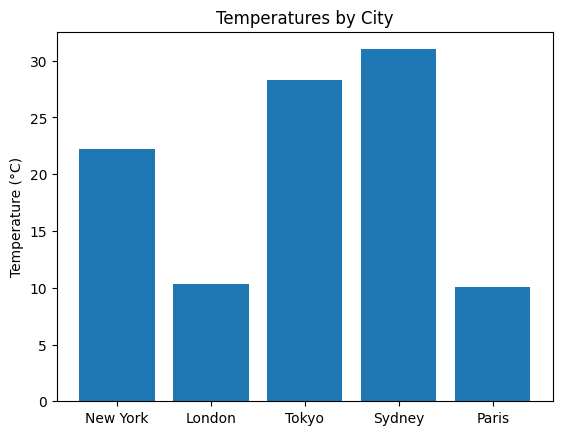

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

cities = ["New York", "London", "Tokyo", "Sydney", "Paris"]
weather_data = []

for city in cities:
    try:
        d = get_weather(city, os.environ['WEATHER_API_KEY'])
        weather_data.append({
            "City": d['location']['name'],
            "Temp (°C)": d['current']['temp_c'],
            "Condition": d['current']['condition']['text']
        })
    except Exception as e:
        print(f"Error fetching {city}: {e}")

df = pd.DataFrame(weather_data)
print(df)

plt.bar(df['City'], df['Temp (°C)'])
plt.title("Temperatures by City")
plt.ylabel("Temperature (°C)")
plt.show()


### Section 6: Key Takeaways

1. **API keys** authenticate and track usage.
2. Use environment variables or `getpass()` to keep them secret.
3. JSON is the standard data format for APIs.
4. You can combine APIs with pandas and matplotlib for analysis and visualization.

**Challenge:**
Find another API that uses keys (e.g. NewsAPI, Giphy, or NASA) and write a short program that fetches and prints something interesting.

### Knowledge Check: APIs and Basic Requests
1. Define what an API (Application Programming Interface) is and explain its purpose in software development.
2. Describe the difference between a GET request and a POST request in an HTTP context.
3. Explain how the `requests` library facilitates communication with web APIs.

In [ ]:
# Your responses here


### Knowledge Check: API Keys and Authentication
1. Discuss the purpose of an API key and how it contributes to API security.
2. Explain why it is important not to share API keys publicly.
3. Describe how environment variables or secure input functions (e.g., `getpass()`) can be used to protect sensitive credentials.

In [ ]:
# Your responses here


### Knowledge Check: Working with JSON Data
1. Explain the structure of a JSON object and how it maps to Python data types.
2. Describe how you can extract specific fields from a JSON response in Python.
3. Discuss why JSON is a preferred format for data interchange in APIs.

In [ ]:
# Your responses here


### Knowledge Check: Data Visualization and Analysis
1. Explain how Python libraries such as `pandas` and `matplotlib` enhance API data analysis.
2. Describe the process of transforming API responses into tabular or visual formats for interpretation.
3. Reflect on how visualization can help reveal insights in data retrieved from APIs.

In [ ]:
# Your responses here


### Knowledge Check: Ethical and Practical Considerations
1. Discuss the ethical responsibilities of developers when using APIs that provide access to public data.
2. Explain the concept of rate limiting and why APIs impose such restrictions.
3. Reflect on potential security concerns when integrating third-party APIs into applications.

In [ ]:
# Your responses here
